# Individual Assignment

You are not provided with data for this assessment, and instead must source it yourself. 

Acquire historical data for the past five years (2020 - 2024) for a selection of 10 stocks that are actively traded (i.e. for which you can obtain complete data for the period). This data should be saved to a single file (CSV recommended) to allow you to carry out the assessment tasks below.


You are expected to produce a Jupyter Notebook (converted to HTML - see below) that contains all the necessary Python code to complete the following tasks.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import yfinance as yf

plt.style.use("ggplot")

RFR = 0.0438  # Risk-free rate is defined by US 10-year government treasury yields from Bloomberg
TRADING_DAYS = 252

## Data Retrieval

Pull the 2020 - 2024 data from Yahoo Finance for ten stocks of your choosing.


Load your data into a single pandas data frame.


Identify and resolve inconsistencies by applying learned data cleaning practices.
If you need to fill in any missing values, provide your reasoning
If your data is already clean, ensure you demonstrate that it is





In [2]:
tickers = ["AAPL","MSFT","GOOG","AMZN","META","TSLA","JPM","BAC","JNJ","WMT"]
groups = []


for ticker in tickers:
    data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)
groups

df = pd.concat(groups)
df


/tmp/ipykernel_1676/2239344852.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1676/2239344852.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1676/2239344852.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1676/2239344852.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 comple

Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,AAPL,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,AAPL,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,AAPL,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,AAPL,72.146927,72.753808,71.926900,72.497514,108872000
2020-01-08,AAPL,73.307518,73.609752,71.849540,71.849540,132079200
...,...,...,...,...,...,...
2024-12-23,WMT,89.885246,91.029332,88.452659,91.029332,26205400
2024-12-24,WMT,92.203255,92.203255,89.885238,89.905140,8992400
2024-12-26,WMT,92.312691,92.402224,91.695877,92.063977,10994000


In [ ]:
print(f"The number of duplicated data is {df.duplicated().sum()}")
print(f"The number of missing data is {df.isnull().sum().sum()}")

In [ ]:
df.info()

In [ ]:
df.to_csv("2020_2024_10stocks.csv")

In [3]:
df = pd.read_csv("2020_2024_10stocks.csv")
df["Date"] = pd.to_datetime(df["Date"])
df



,Date,Ticker,Close,High,Low,Open,Volume
0,2020-01-02,AAPL,72.620842,72.681289,71.373218,71.627092,135480400
1,2020-01-03,AAPL,71.914810,72.676439,71.689950,71.847110,146322800
2,2020-01-06,AAPL,72.487839,72.526526,70.783241,71.034702,118387200
3,2020-01-07,AAPL,72.146942,72.753823,71.926915,72.497529,108872000
4,2020-01-08,AAPL,73.307518,73.609752,71.849540,71.849540,132079200
...,...,...,...,...,...,...,...
12565,2024-12-23,WMT,89.885246,91.029332,88.452659,91.029332,26205400
12566,2024-12-24,WMT,92.203255,92.203255,89.885238,89.905140,8992400
12567,2024-12-26,WMT,92.312691,92.402224,91.695877,92.063977,10994000
12568,2024-12-27,WMT,91.188515,91.874960,90.561751,91.656091,11384400


## Data Exploration

Present the head and tail of a wide data frame that shows the closing prices for each stock.


Create a single plot showing the closing prices of all ten stocks over the five year period.


In [4]:
df_pivot = df.pivot(index="Date", columns="Ticker", values="Close")
df_pivot.head()



Ticker,AAPL,AMZN,BAC,GOOG,JNJ,JPM,META,MSFT,TSLA,WMT
Date,,,,,,,,,,
2020-01-02,72.620842,94.900497,31.092310,67.964508,124.983665,120.733559,208.635422,153.042297,28.684000,36.593372
2020-01-03,71.914810,93.748497,30.446743,67.630981,123.536667,119.140274,207.531464,151.136673,29.534000,36.270325
2020-01-06,72.487839,95.143997,30.403111,69.298576,123.382530,119.045593,211.440033,151.527328,30.102667,36.196487
2020-01-07,72.146942,95.343002,30.202467,69.255341,124.136017,117.021744,211.897491,150.145737,31.270666,35.861134
2020-01-08,73.307518,94.598503,30.507807,69.801094,124.118912,117.934616,214.045731,152.537308,32.809334,35.738075


In [ ]:
df_pivot.tail()

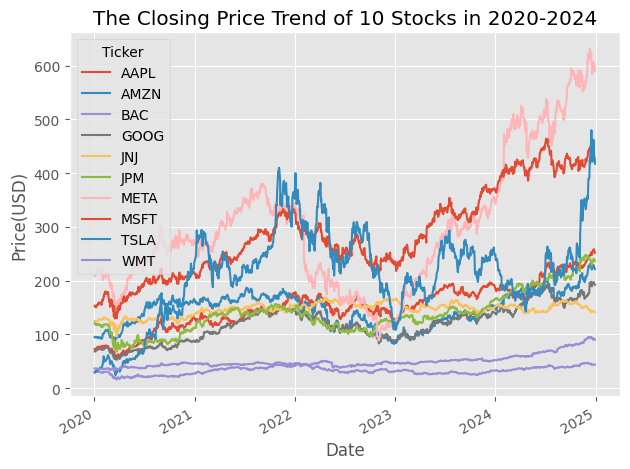

In [5]:
df_pivot.plot()
plt.title("The Closing Price Trend of 10 Stocks in 2020-2024")
plt.ylabel("Price(USD)")
plt.xlabel("Date")
plt.tight_layout()

## Backtesting

For each stock, implement and backtest a Bollinger Bands Mean Reversion strategy

- Generate signals and positions as per the "A2 Strategies" document




- Setup Bollinger Bands:
    - Calculate Bollinger Bands on closing prices, comprising of the middle band (20-day simple moving average), and the upper and lower bands (at 2 standard deviations from the middle band).
- Generate Entry Signals:
    - Buy Signal: Initiated when the asset’s closing price falls below the lower Bollinger Band, signaling a potential opportunity to buy, expecting a price increase towards the middle band.
    - Sell Signal: Initiated when the asset’s closing price exceeds the upper Bollinger Band, signaling a potential opportunity to sell, anticipating a price decrease towards the middle band.
- Generate Exit Signals:
    - Exit Buy Position: When the price rises back to the middle band, indicating that the mean reversion has occurred and it's time to exit the long position.
    - Exit Sell Position: When the price declines back to the middle band, suggesting that the price has reverted to its mean, and the short position should be closed.

- Calculate the simple daily returns and the daily returns of your strategy

- Display the end-of-period cumulative return for your strategy vs. buy+hold

In [6]:
def Bollinger_Bands_Strategy(stock_data, WINDOW):
    data = stock_data.copy()
    data["SMA"] = data["Close"].rolling(WINDOW).mean()
    data["STD"] = data["Close"].rolling(WINDOW).std()
    data["Upper_BB"] = data["SMA"] + 2 * data["STD"]
    data["Lower_BB"] = data["SMA"] - 2 * data["STD"]  
    data["Signal"] = np.nan
    data["Signal"] = np.where(data["Close"] < data["Lower_BB"], 1, data["Signal"])
    data["Signal"] = np.where(data["Close"] > data["Upper_BB"], -1, data["Signal"])
    data["Signal"] = data["Signal"].ffill().fillna(0)
    data["Position"] = data["Signal"].shift()
    data["Returns"] = data["Close"].pct_change()
    data["Strategy"] = data["Returns"] * data["Position"]
    data["CumuReturns"] = (1 + data["Returns"]).cumprod() - 1
    data["CumuStrategy"] = (1 + data["Strategy"]).cumprod() - 1
    return data

In [7]:
WINDOW = 20

grouped = df.groupby("Ticker")

Bollinger_results = {}

for name, group in grouped:
    print(f"Now processing signals for {name}....")
    processed_data = Bollinger_Bands_Strategy(group, WINDOW)
    Bollinger_results[name] = processed_data


df = pd.concat(Bollinger_results)
df

Now processing signals for AAPL....
Now processing signals for AMZN....
Now processing signals for BAC....
Now processing signals for GOOG....
Now processing signals for JNJ....
Now processing signals for JPM....
Now processing signals for META....
Now processing signals for MSFT....
Now processing signals for TSLA....
Now processing signals for WMT....


Date Ticker      Close       High        Low       Open  \
AAPL 0     2020-01-02   AAPL  72.620842  72.681289  71.373218  71.627092   
     1     2020-01-03   AAPL  71.914810  72.676439  71.689950  71.847110   
     2     2020-01-06   AAPL  72.487839  72.526526  70.783241  71.034702   
     3     2020-01-07   AAPL  72.146942  72.753823  71.926915  72.497529   
     4     2020-01-08   AAPL  73.307518  73.609752  71.849540  71.849540   
...               ...    ...        ...        ...        ...        ...   
WMT  12565 2024-12-23    WMT  89.885246  91.029332  88.452659  91.029332   
     12566 2024-12-24    WMT  92.203255  92.203255  89.885238  89.905140   
     12567 2024-12-26    WMT  92.312691  92.402224  91.695877  92.063977   
     12568 2024-12-27    WMT  91.188515  91.874960  90.561751  91.656091   
     12569 2024-12-30    WMT  90.104111  90.601539  89.666372  90.263291   

               Volume        SMA       STD   Upper_BB   Lower_BB  Signal  \
AAPL 0      135480400        NaN       NaN        NaN        NaN     0.0   
     1      146322800        NaN       NaN        NaN        NaN     0.0   
     2      118387200        NaN       NaN        NaN        NaN     0.0   
     3      108872000        NaN       NaN        NaN        NaN     0.0   
     4      132079200        NaN       NaN        NaN        NaN     0.0   
...               ...        ...       ...        ...        ...     ...   
WMT  12565   26205400  92.800955  1.699359  96.199673  89.402237    -1.0   
     12566    8992400  92.968979  1.432591  95.834161  90.103798    -1.0   
     12567   10994000  93.052640  1.334919  95.722478  90.382801    -1.0   
     12568   11384400  93.051801  1.336146  95.724093  90.379508    -1.0   
     12569    9790200  92.965969  1.468019  95.902006  90.029931    -1.0   

            Position   Returns  Strategy  CumuReturns  CumuStrategy  
AAPL 0           NaN       NaN       NaN          NaN           NaN  
     1           0.0 -0.009722 -0.000000    -0.009722      0.000000  
     2           0.0  0.007968  0.000000    -0.001831      0.000000  
     3           0.0 -0.004703 -0.000000    -0.006526      0.000000  
     4           0.0  0.016086  0.000000     0.009456      0.000000  
...              ...       ...       ...          ...           ...  
WMT  12565      -1.0 -0.020490  0.020490     1.456326      0.334613  
     12566      -1.0  0.025789 -0.025789     1.519671      0.300196  
     12567      -1.0  0.001187 -0.001187     1.522661      0.298652  
     12568      -1.0 -0.012178  0.012178     1.491941      0.314467  
     12569      -1.0 -0.011892  0.011892     1.462307      0.330099  

[12570 rows x 17 columns]

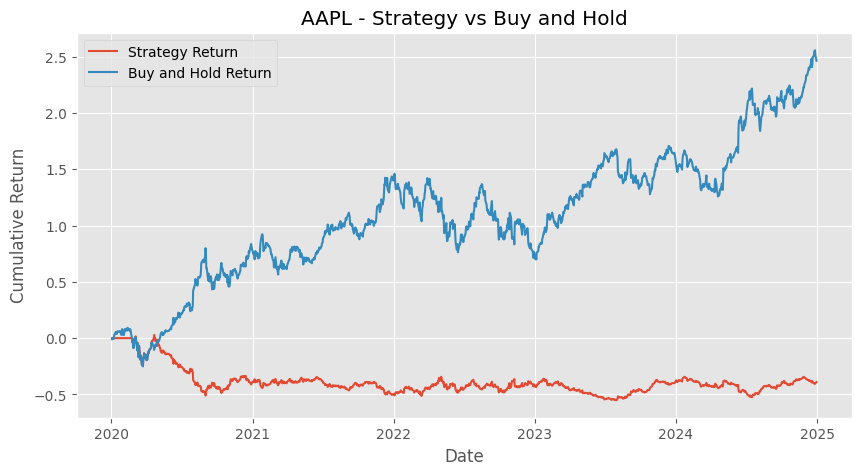

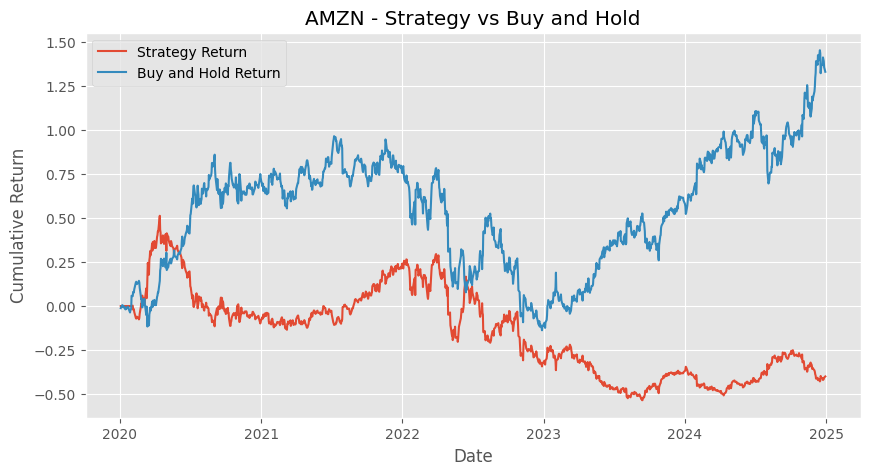

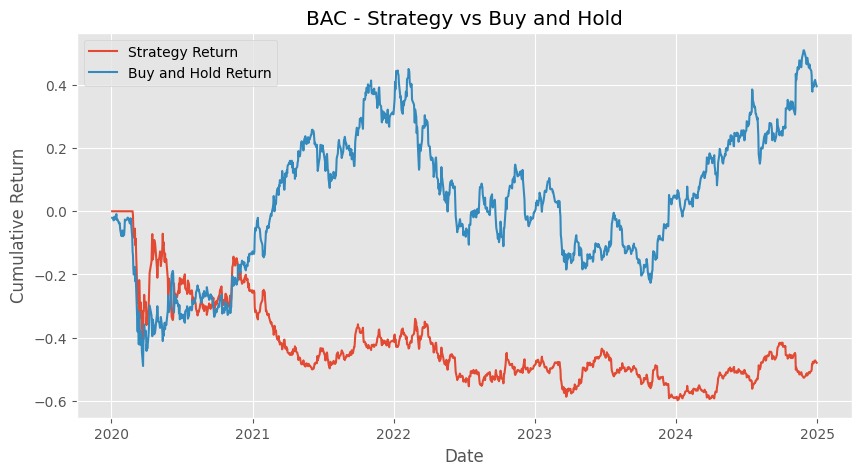

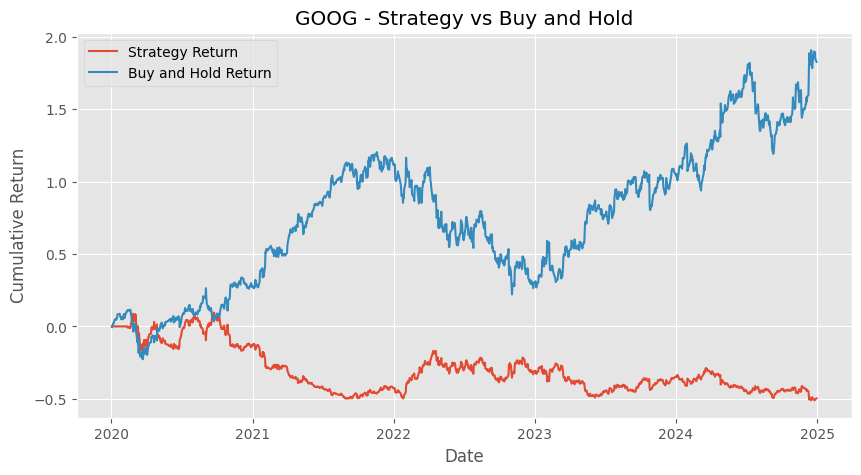

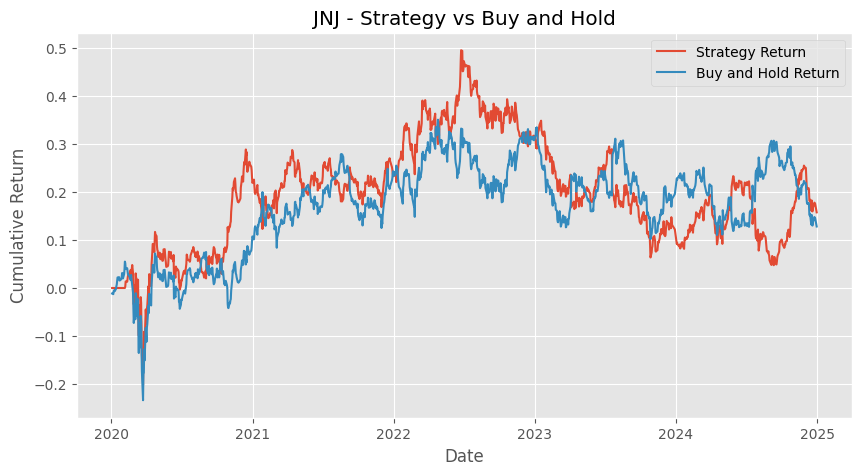

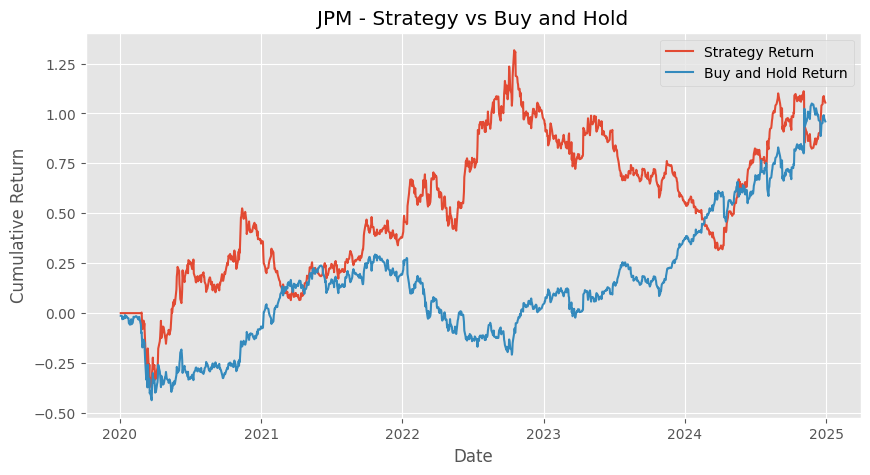

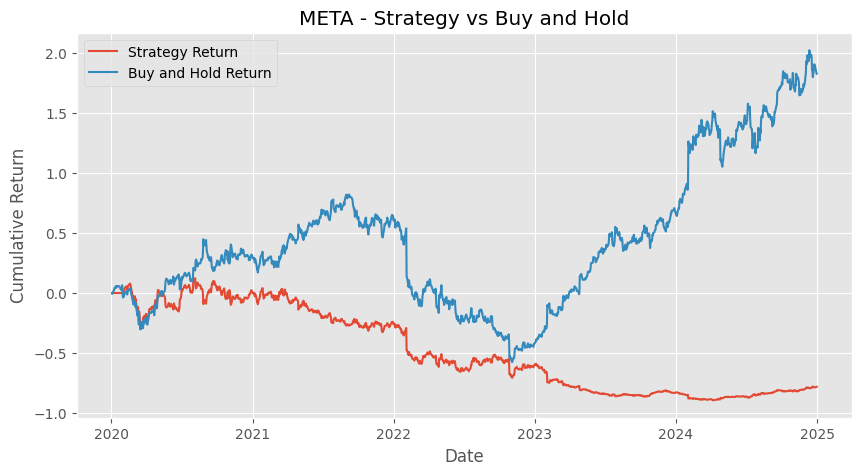

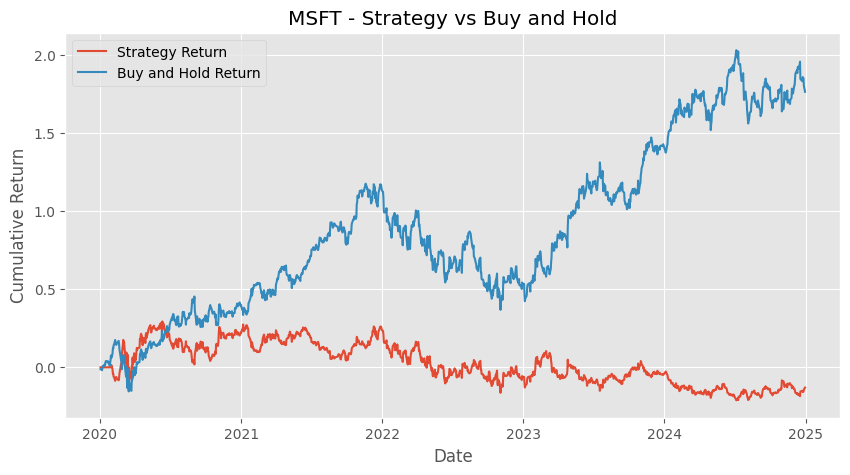

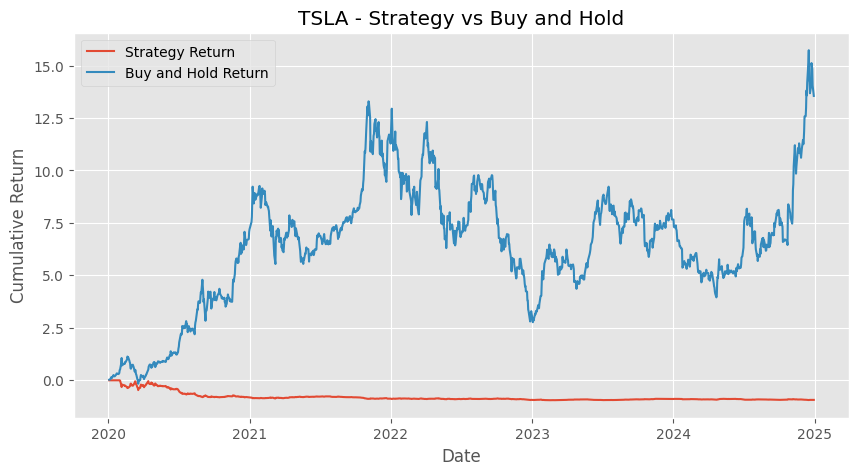

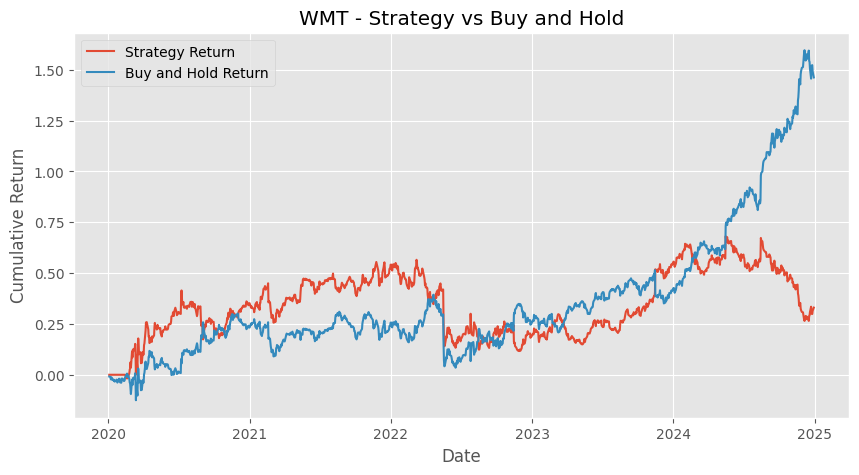

In [9]:
for stock, data in Bollinger_results.items():
    plt.figure(figsize=(10, 5))
    plt.plot(data.Date, data["CumuStrategy"], label="Strategy Return")
    plt.plot(data.Date, data["CumuReturns"], label="Buy and Hold Return")
    plt.title(f"{stock} - Strategy vs Buy and Hold")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.show()

## Portfolio Management

Visualise the portfolio by plotting the correlation matrix of its simple daily returns.


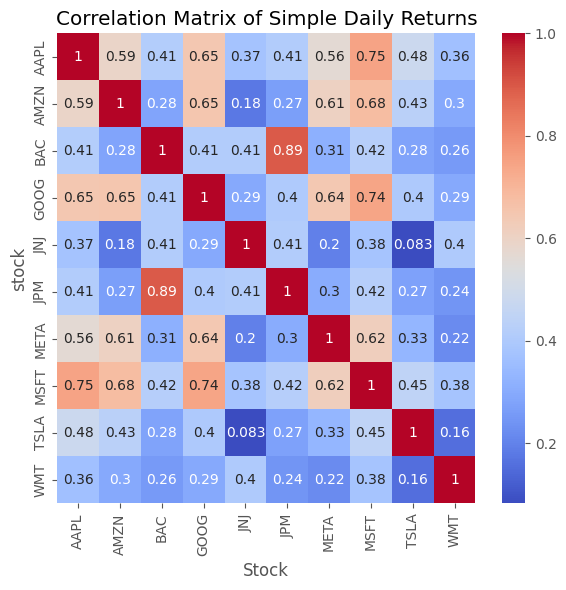

In [29]:
import seaborn as sns

returns = df_pivot.pct_change()
returns.dropna(inplace=True)
returns

plt.figure(figsize=(6, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Simple Daily Returns')
plt.xlabel("Stock")
plt.ylabel("stock")
plt.tight_layout()
plt.show()


Create a portfolio of the 10 stocks with equal initial weights.

Calculate the portfolio returns and cumulative returns.

Calculate the daily standard deviation of portfolio returns as a risk measurement.

In [41]:
equal_weights = np.ones(10)/10
equal_weights

p_returns = np.dot(returns, equal_weights)
p_returns

# portfolio_returns = (returns * equal_weights).sum(axis=1)

p_cumureturns = (1 + p_returns).cumprod() - 1
p_cumureturns

annualised_returns = p_returns.mean() * TRADING_DAYS
print(f"The annualised returns of this equal weights portfolio is {annualised_returns}")


The annualised returns of this equal weights portfolio is 0.2687299228758364


In [36]:
p_volatility = p_returns.std()
print(f"The daily standard deviation of this portfolio is {p_volatility}")

The daily standard deviation of this portfolio is 0.015413575715981578


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(p_cumureturns)
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

## Portfolio Optimisation

Implement simple portfolio optimisation by maximising the Sharpe Ratio.

In [42]:
annualised_volatility = p_volatility * np.sqrt(TRADING_DAYS)

Sharpe_Ratio = (annualised_returns - RFR) / annualised_volatility

print(f"Sharpe ratio is {Sharpe_Ratio} ")

Sharpe ratio is 0.919271008561014 


In [ ]:
# optimize the portfolio by maximize the sharpe ratio of the portfolio
def negative_sharpe (weights):
    p_returns = np.dot(returns, weights)
    annualised_returns = p_returns.mean() * TRADING_DAYS
    annualised_volatility = p_returns.std() * np.sqrt (TRADING_DAYS)
    sharpe = (annualised_returns - RFR) / annualised_volatility
    return -sharpe


cons = {"type": "eq","fun": lambda x: sum(x) - 1 }

bounds = tuple((0, 1) for x in range (10))

int_weights = np.ones(10)/10

optimal = minimize(negative_sharpe, int_weights, bounds = bounds, constraints= cons)
opt_weights = optimal.x
opt_weights_percentage = opt_weights * 100

tickers = ["AAPL","MSFT","GOOG","AMZN","META","TSLA","JPM","BAC","JNJ","WMT"]

print("Optimal Weights (%):")
for i, weight in enumerate(opt_weights_percentage):
    print(f"{tickers [i]}: {weight:.4f}%")

Optimal Weights (%):
AAPL: 9.0632%
MSFT: 0.0000%
GOOG: 0.0000%
AMZN: 1.2284%
META: 0.0000%
TSLA: 0.0000%
JPM: 5.6945%
BAC: 0.0000%
JNJ: 31.1307%
WMT: 52.8832%


In [50]:
def calculate_sharpe_ratio(weights):
    p_returns = np.dot(returns, weights)
    annualised_returns = p_returns.mean() * TRADING_DAYS
    annualised_volatility = p_returns.std() * np.sqrt(TRADING_DAYS)
    sharpe_ratio = (annualised_returns - RFR) / annualised_volatility
    return sharpe_ratio

optimal_sharpe_ratio = calculate_sharpe_ratio(opt_weights)

print(f"\nOptimal Portfolio Sharpe Ratio: {optimal_sharpe_ratio:.4f}")


Optimal Portfolio Sharpe Ratio: 1.2213


Implement an AI-generated portfolio optimisation

- Follow the guidelines in the "A2 Optimisation" document

Visually (by plotting) compare the:
- Cumulative Sharpe Ratio optimised portfolio returns
- Cumulative portfolio returns optimised using the AI-generated approach
- Cumulative initial (equal-weighting) portfolio returns.


## Reporting
Based on your strategy backtest results and portfolio optimisation, write a 2-4 paragraph report at the end of the Notebook. Your report should cover:
- The portfolio optimisation you recommend
- The proposed optimal weights for each stock, displayed as a table
- The stocks, if any, you advise trading based on the mean reversion strategy
- A commentary on the clarity and ease of integration of the code generated by the AI tools.
- An overall recommendation for investment - should the firm consider this portfolio?

